In [1]:
import pandas as pd
import numpy as np

In [ ]:
# Gold #1
gold1 = pd.read_csv('../../reuters_data/Osaka Exchange Gold Full Session Commodity Future Continuation 1.csv', sep=';')
gold1 = gold1.iloc[:,:2]
gold1['Date'] = pd.to_datetime(gold1['Date'], format='%d-%b-%Y')
gold1['Price'] = gold1['Price'].str.replace(',', '.').astype(float)
gold1 = gold1.sort_values(by='Date').reset_index(drop=True)
gold1.head()

,Date,Price
0,2017-01-04,4.405
1,2017-01-05,4.393
2,2017-01-06,4.378
3,2017-01-10,4.400
4,2017-01-11,4.422


In [ ]:
gold2 = pd.read_csv('../../reuters_data/Multi Commodity Exchange Of India Gold Commodity Future Continuation 1.csv', sep=';')
gold2 = gold2.iloc[:,:2]
gold2['Date'] = pd.to_datetime(gold2['Date'], format='%d-%b-%Y')
gold2['Price'] = gold2['Price'].str.replace(',', '')  # remove thousands separator
gold2['Price'] = gold2['Price'].astype(float)
gold2 = gold2.sort_values(by='Date').reset_index(drop=True)
gold2.head()

,Date,Price
0,2017-01-02,27570.0
1,2017-01-03,27778.0
2,2017-01-04,27682.0
3,2017-01-05,27948.0
4,2017-01-06,27887.0


In [ ]:
# Load data source #1 - Lithium prices in USD per kilogram
df1 = pd.read_csv('../../data/Lithium_prices_2017-01-01_to_2021-12-31_merged.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Price'] = df1['Price'].astype(float)
df1 = df1.drop(columns=['Unit'])
df1.head()

,Date,Price
0,2017-05-10,20.92
1,2017-05-11,20.92
2,2017-05-12,20.92
3,2017-05-15,20.92
4,2017-05-16,20.92


In [ ]:
# Load Nickel data source #2 - Nickel HLOC from LME
dfn2 = pd.read_csv('../../bloomberg_data/nickel_HLOC_2017_2024.csv', sep=';')
dfn2['Date'] = pd.to_datetime(dfn2['Date'], dayfirst=True)
dfn2 = dfn2.rename(columns={'PX_LAST': 'Price'})
dfn2['Price'] = dfn2['Price'].astype(float)
dfn2 = dfn2.drop(index=0)
dfn2 = dfn2.sort_values(by='Date')
dfn2 = dfn2.iloc[:, :2] 
dfn2['Price'] = dfn2['Price']
dfn2.head()

,Date,Price
2014,2016-12-30,10020.0
2013,2017-01-03,9910.0
2012,2017-01-04,10220.0
2011,2017-01-05,10295.0
2010,2017-01-06,10245.0


In [ ]:
dfc2 = pd.read_csv('../../bloomberg_data/cobalt_HLOC_2017_2024.csv', sep=';')
dfc2['Date'] = pd.to_datetime(dfc2['Date'], dayfirst=True)
dfc2 = dfc2.rename(columns={'PX_LAST': 'Price'})
# Replace commas with dots and convert the 'Price' column to float
dfc2['Price'] = dfc2['Price'].str.replace(',', '.').astype(float)
dfc2 = dfc2.drop(index=0)
dfc2 = dfc2.sort_values(by='Date')
dfc2 = dfc2.iloc[:, :2]
dfc2['Price'] = dfc2['Price']
dfc2.head()

,Date,Price
2019,2016-12-30,32734.0
2018,2017-01-03,32735.0
2017,2017-01-04,32736.0
2016,2017-01-05,32739.5
2015,2017-01-06,32740.5


In [ ]:
dfcu3 = pd.read_csv('../../reuters_data/LME 3M Copper Composite Commodity Forward.csv', sep=';')
dfcu3 = dfcu3.rename(columns={'Exchange Date': 'Date'})
dfcu3 = dfcu3.rename(columns={'Close' : 'Price'})
dfcu3['Date'] = pd.to_datetime(dfcu3['Date'], format='%d-%b-%Y')
dfcu3['Price'] = dfcu3['Price'].str.replace('\xa0', '').str.replace(',', '.').astype(float)
dfcu3 = dfcu3.sort_values(by='Date')
dfcu3 = dfcu3.iloc[:, :2]
dfcu3.head()

,Date,Price
2111,2017-01-03,5500.0
2110,2017-01-04,5644.0
2109,2017-01-05,5580.0
2108,2017-01-06,5590.0
2107,2017-01-09,5591.0


In [24]:
# Merge all dataframes on 'Date'
df_merged = pd.merge(gold1, gold2, on='Date', suffixes=('_gold1', '_gold2'))
df_merged = pd.merge(df_merged, df1, on='Date', how='inner')
df_merged.rename(columns={'Price': 'Lithium_Price'}, inplace=True)
df_merged = pd.merge(df_merged, dfn2, on='Date', how='inner')
df_merged.rename(columns={'Price': 'Nickel_Price'}, inplace=True)
df_merged = pd.merge(df_merged, dfc2, on='Date', how='inner')
df_merged.rename(columns={'Price': 'Cobalt_Price'}, inplace=True)
df_merged = pd.merge(df_merged, dfcu3, on='Date', how='inner')
df_merged.rename(columns={'Price': 'Copper_Price'}, inplace=True)
df_merged = df_merged.sort_values(by='Date').reset_index(drop=True)
df_merged.head()

,Date,Price_gold1,Price_gold2,Lithium_Price,Nickel_Price,Cobalt_Price,Copper_Price
0,2017-05-10,4.468,27996.0,20.92,9120.0,54550.00,5500.5
1,2017-05-11,4.478,28004.0,20.92,9315.0,54550.00,5543.0
2,2017-05-12,4.481,28005.0,20.92,9315.0,54550.00,5559.5
3,2017-05-15,4.481,27992.0,20.92,9235.0,54550.00,5613.0
4,2017-05-16,4.494,28094.0,20.92,9120.0,55543.75,5611.0


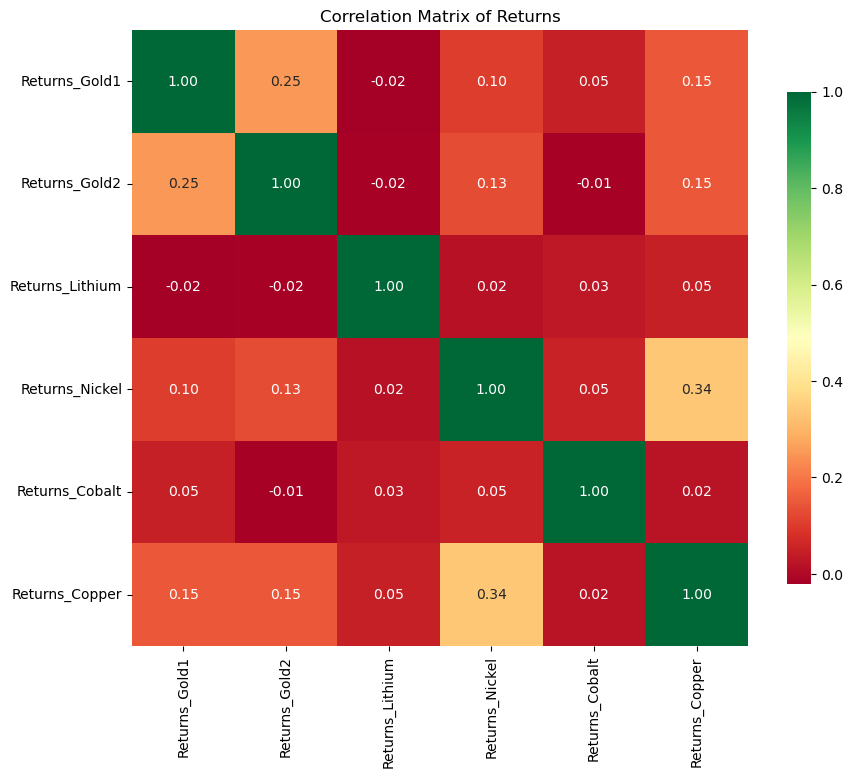

In [26]:
df_merged['Returns_Gold1'] = df_merged['Price_gold1'].pct_change()
df_merged['Returns_Gold2'] = df_merged['Price_gold2'].pct_change()
df_merged['Returns_Lithium'] = df_merged['Lithium_Price'].pct_change()
df_merged['Returns_Nickel'] = df_merged['Nickel_Price'].pct_change()
df_merged['Returns_Cobalt'] = df_merged['Cobalt_Price'].pct_change()
df_merged['Returns_Copper'] = df_merged['Copper_Price'].pct_change()

df_merged = df_merged.dropna().reset_index(drop=True)
corellation_matrix = df_merged[['Returns_Gold1', 'Returns_Gold2', 'Returns_Lithium', 'Returns_Nickel', 'Returns_Cobalt', 'Returns_Copper']].corr()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(corellation_matrix, annot=True, cmap='RdYlGn', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Returns')
plt.show()